In [ ]:
Клонирование репозитория с логами

In [1]:
!git clone https://github.com/logpai/loghub.git

Cloning into 'loghub'...
remote: Enumerating objects: 575, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 575 (delta 145), reused 135 (delta 132), pack-reused 404 (from 1)
Receiving objects: 100% (575/575), 7.27 MiB | 14.52 MiB/s, done.
Resolving deltas: 100% (267/267), done.


In [ ]:
Переход в директорию с логами HPC

In [2]:
%cd loghub/HPC

/home/parallels/Desktop/SSSL/loghub/HPC


/usr/lib/python3/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
получение списка всех файлов логов в папке:

In [3]:
import os

# Получить список всех файлов логов в текущей директории
log_files = [file for file in os.listdir() if file.endswith('.log')]
print("Найденные файлы логов:", log_files)

Найденные файлы логов: ['HPC_2k.log']


In [ ]:
Парсинг логов

In [24]:
import re
import pandas as pd

# Путь к файлу логов
log_file_path = 'HPC_2k.log'

# Список для хранения результатов парсинга
parsed_logs = []

# Регулярное выражение для текущего формата строк логов
regex_pattern = r"(\d+)\s+(\w+-\d+)\s+([\w\.]+)\s+([\w\.]+)\s+\d+\s+.*\(HWID=(\d+)\)"

# Чтение файла и парсинг строк
with open(log_file_path, 'r') as file:
    for line in file:
        match = re.search(regex_pattern, line)
        if match:
            parsed_logs.append({
                'id': match.group(1),
                'node': match.group(2),
                'component': match.group(3),
                'state': match.group(4),
                'hwid': match.group(5)
            })

# Преобразование в DataFrame
logs_df = pd.DataFrame(parsed_logs)
logs_df.head()

,id,node,component,state,hwid
0,134681,node-246,unix.hw,state_change.unavailable,1973
1,350766,node-109,unix.hw,state_change.unavailable,3180
2,344518,node-246,unix.hw,state_change.unavailable,5089
3,344448,node-153,unix.hw,state_change.unavailable,4088
4,366633,node-200,unix.hw,state_change.unavailable,2538


In [ ]:
Сохранение данных в CSV

In [25]:
logs_df.to_csv('parsed_hpc_logs.csv', index=False)
print("Данные сохранены в 'parsed_hpc_logs.csv'")

Данные сохранены в 'parsed_hpc_logs.csv'


In [35]:
# Анализ распределения значений для столбца 'node'
node_counts = logs_df['node'].value_counts()
print("Distribution for 'node':")
print(node_counts)
print("\n" + "="*50 + "\n")

# Анализ распределения значений для столбца 'component'
component_counts = logs_df['component'].value_counts()
print("Distribution for 'component':")
print(component_counts)
print("\n" + "="*50 + "\n")

# Анализ распределения значений для столбца 'state'
state_counts = logs_df['state'].value_counts()
print("Distribution for 'state':")
print(state_counts)

Distribution for 'node':
node
node-246    2
node-109    1
node-153    1
node-200    1
node-122    1
node-228    1
node-10     1
node-130    1
node-169    1
node-187    1
node-199    1
Name: count, dtype: int64


Distribution for 'component':
component
unix.hw    12
Name: count, dtype: int64


Distribution for 'state':
state
state_change.unavailable    12
Name: count, dtype: int64


In [ ]:
Tables

In [41]:
import pandas as pd

# Создание таблицы распределения значений для столбцов 'node', 'component', и 'state'
summary_data = {
    'node': logs_df['node'].value_counts(),
    'component': logs_df['component'].value_counts(),
    'state': logs_df['state'].value_counts()
}

# Преобразование в DataFrame
summary_df = pd.DataFrame.from_dict(summary_data, orient='index').transpose()

# Отображение таблицы
print("Сводная таблица для столбцов логов HPC:")
print(summary_df)



Сводная таблица для столбцов логов HPC:
                          node  component  state
node-246                   2.0        NaN    NaN
node-109                   1.0        NaN    NaN
node-153                   1.0        NaN    NaN
node-200                   1.0        NaN    NaN
node-122                   1.0        NaN    NaN
node-228                   1.0        NaN    NaN
node-10                    1.0        NaN    NaN
node-130                   1.0        NaN    NaN
node-169                   1.0        NaN    NaN
node-187                   1.0        NaN    NaN
node-199                   1.0        NaN    NaN
unix.hw                    NaN       12.0    NaN
state_change.unavailable   NaN        NaN   12.0


In [42]:
Построение графиков для столбцов node, component, и state:

SyntaxError: invalid syntax (590177380.py, line 1)

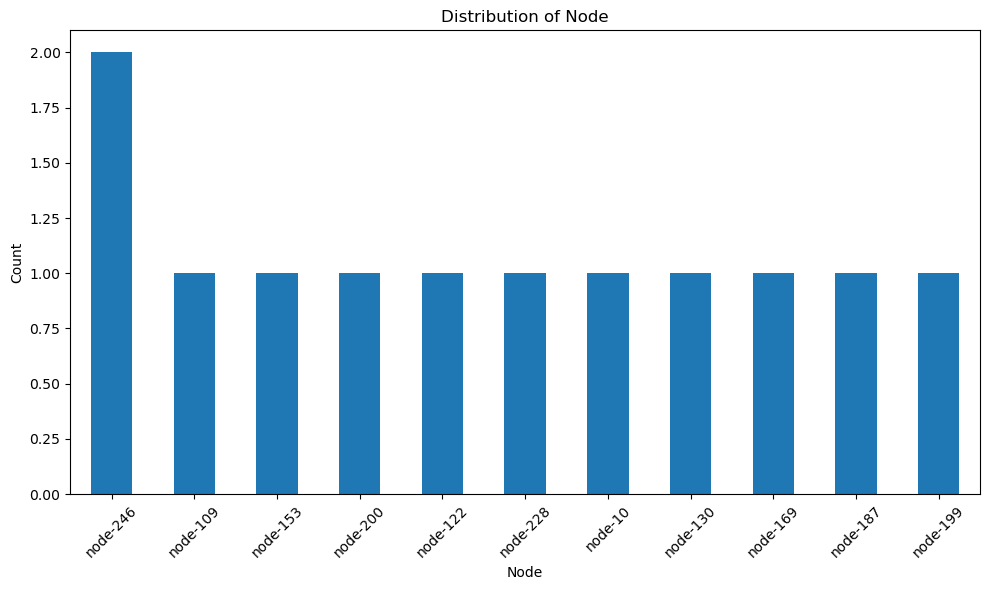

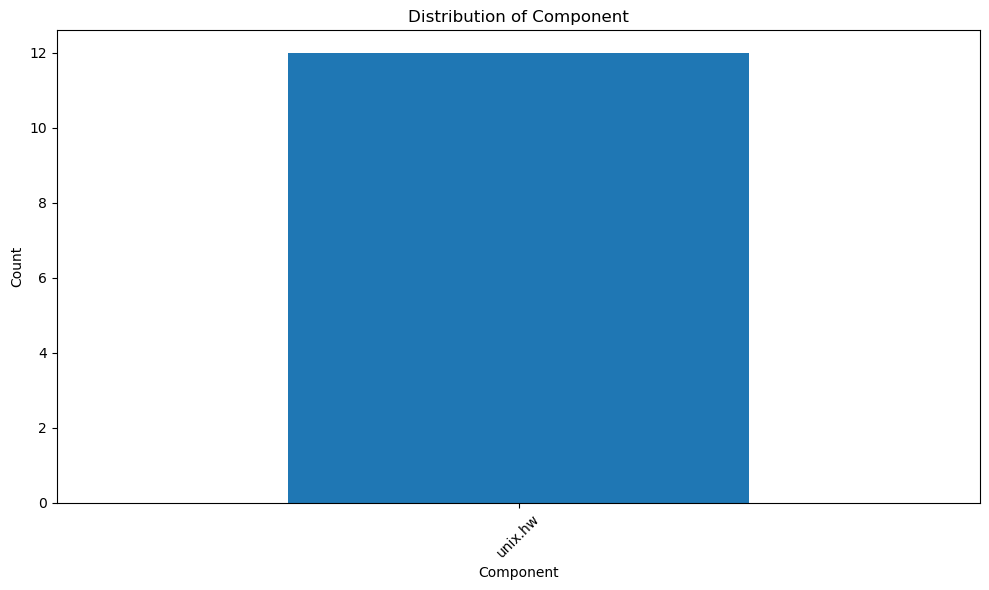

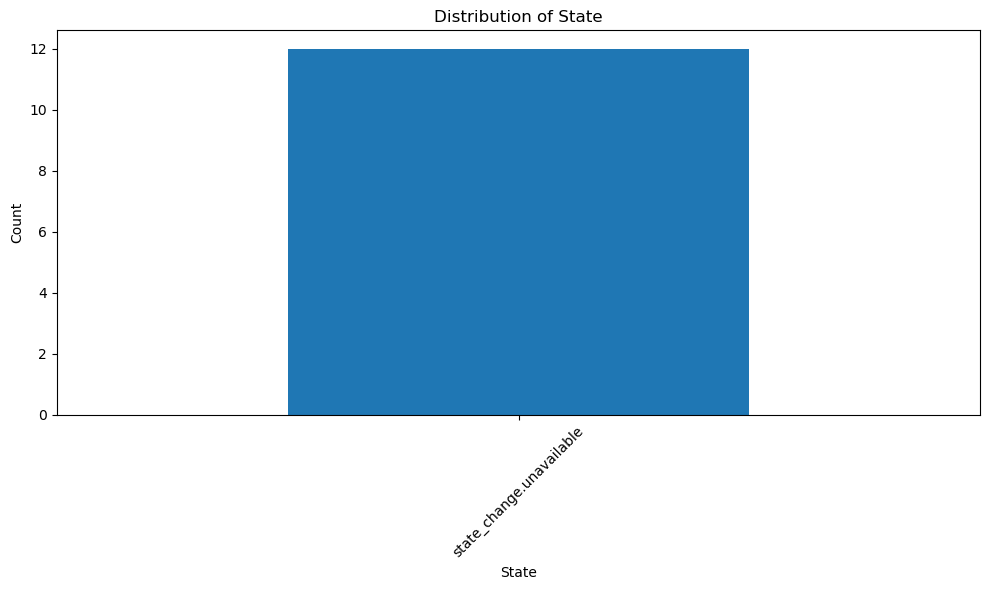

In [43]:
# Создание графиков для каждого категориального столбца

# Распределение значений для столбца 'node'
node_counts = logs_df['node'].value_counts()
plt.figure(figsize=(10, 6))
node_counts.plot(kind='bar')
plt.xlabel('Node')
plt.ylabel('Count')
plt.title('Distribution of Node')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Распределение значений для столбца 'component'
component_counts = logs_df['component'].value_counts()
plt.figure(figsize=(10, 6))
component_counts.plot(kind='bar')
plt.xlabel('Component')
plt.ylabel('Count')
plt.title('Distribution of Component')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Распределение значений для столбца 'state'
state_counts = logs_df['state'].value_counts()
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
plt.savefig('State_distribution.png')
print("График сохранён в 'State_distribution.png'")

График сохранён в 'State_distribution.png'


<Figure size 640x480 with 0 Axes>